In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from trader import Trader
from datamodel import OrderDepth, UserId, TradingState, Order, Listing, Trade
from utils import get_tradehistory, get_mytrades, get_pnl
from exchange import Exchange

ModuleNotFoundError: No module named 'datamodel'

In [3]:
mp = pd.read_csv("data/prices_day_-2.csv", sep=";")
timestamps = list(mp["timestamp"].unique())
ex = Exchange()
trader = Trader()
state = ex.state_start

pnls = ex.iterate(timestamps, mp, trader, 
                extra_bot_orders="probabilistic", p=0.5, q=1., 
                verbose=0, logging=True)

In [5]:
# process log
buy_time, buy_price, buy_qt, sell_time, sell_price, sell_qt = [], [], [], [], [], []
for trade in ex.trade_hist["STARFRUIT"]:
    if len(trade.seller) > 1:
        sell_time.append(trade.timestamp)
        sell_price.append(trade.price)
        sell_qt.append(trade.quantity)
    elif len(trade.buyer) > 1:
        buy_time.append(trade.timestamp)
        buy_price.append(trade.price)
        buy_qt.append(trade.quantity)

In [4]:
print("average buy price: ", np.array(buy_price).mean(),
      "\naverage sell price: ", np.array(sell_price).mean())

average buy price:  5015.617021276596 
average sell price:  5017.906779661017


The problem is that the algo doesn't manage to exit the long position in one go, so it tries to sell it again and again until it exits the position, even if the price is not favourable.

One possible fixes: set upper limit for possible loss in a trade; set maximum long position (way below position limit). This might limit the profit

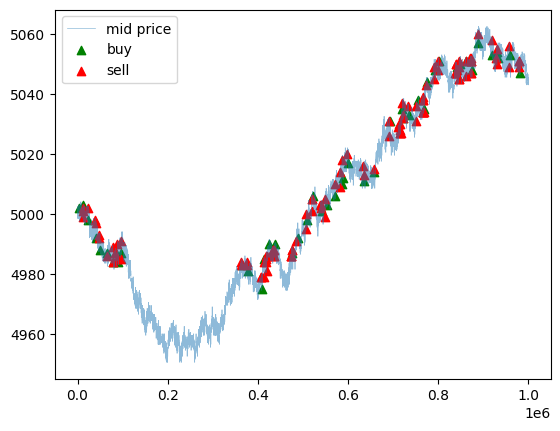

In [5]:
plt.plot(timestamps, mp.loc[mp["product"]=="STARFRUIT"]["mid_price"], 
         lw=0.5, label="mid price", alpha=0.5)
plt.scatter(buy_time, buy_price, color='g', marker='^', label="buy")
plt.scatter(sell_time, sell_price, color='r', marker='^', label="sell")
plt.legend()
plt.show()

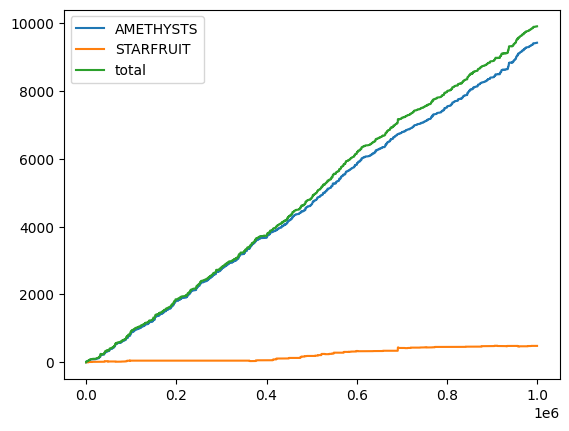

In [6]:
plt.plot(timestamps, pnls["AMETHYSTS"], label="AMETHYSTS")
plt.plot(timestamps, pnls["STARFRUIT"], label="STARFRUIT")
plt.plot(timestamps, np.array(pnls["STARFRUIT"])+np.array(pnls["AMETHYSTS"]), label="total")
plt.legend()
plt.show()